<a href="https://colab.research.google.com/github/lsilva18/EvolutionaryComputation/blob/main/Lista04Ex02_LinearOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar pacote DEAP e importar o que for necessário

In [ ]:
# https://deap.readthedocs.io/en/master/
!pip install deap

     |████████████████████████████████| 163kB 2.8MB/s 


In [ ]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
import matplotlib.pyplot  as plt
from deap import algorithms, base
from deap import creator, tools

### O problema - minimização com restrições lineares
A WINDOR GLASS Inc. dispõe de capacidade extra para produzir dois novos produtos. A demanda é muito maior que a capacidade disponível (toda produção poderá ser vendida). Pergunta-se: 
* (a) o que produzir? 
* (b) quanto produzir? 
* (c) qual será o lucro? Os dados estão na tabela abaixo.


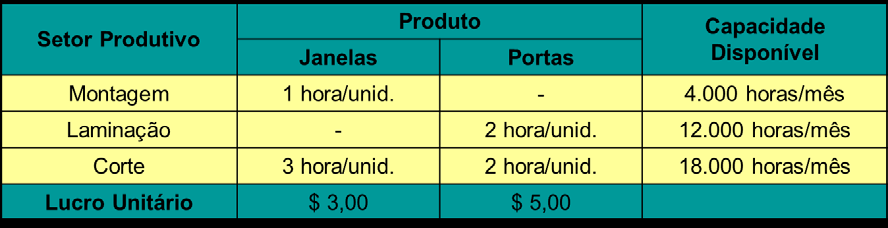


**Variáveis**
* X1 = qtde. de janelas, em milhares de unidades;
* X2 = qtde. de portas, em milhares de unidades;
* Z = lucro total obtido com novos produtos.


**Restrições**
* a) disponibilidade do setor de montagem;
* b) disponibilidade do setor de laminação;
* c) disponibilidade do setor de corte;
* d) quantidades não negativas.

**Objetivo:**
* Maximizar o lucro total da empresa

## Constantes do problema

In [ ]:
LIMINF, LIMSUP = 0, 9000
MONTAGEM, LAMINACAO, CORTE = 4000, 12000, 18000 
IND_SIZE=2 # quantidade de variaveis de decisao

## Preparação para Otimização


### Função Objetivo

In [ ]:
# Função Objetivo
def objective_function(individual):
    return (individual[0]*3 + individual[1]*5),

### Penalização

In [ ]:
def feasible(individual):
    if individual[0] > MONTAGEM:
      return False
    if individual[1]*2 > LAMINACAO:
      return False
    if individual[0]*3 + individual[1]*2 > CORTE:
      return False
    return True
def distance(individual):
    constraint1 = abs(individual[0] - MONTAGEM)
    constraint2 = abs(individual[1]*2 - LAMINACAO )
    constraint3 = abs(individual[0]*3 + individual[1]*2 - CORTE)
    return constraint1 + constraint2 + constraint3

### Indivíduos e Variáveis de Decisão

In [ ]:
creator.create("FitnessMax", base.Fitness  , weights=(1.0,))         # função objetivo: <nome>, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMax)      # indivíduo

In [ ]:
toolbox = base.Toolbox()

# Gerador de atributos reais: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("attr_int", random.randint, LIMINF, LIMSUP)   # variáveis inteiras

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, IND_SIZE)    # IND_SIZE: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                          # lista de indivíduos

### Operadores

In [ ]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 0, distance))       
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=LIMINF, up=LIMSUP, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

## Criando população e hall da fama

In [ ]:
pop = toolbox.population(n=100)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo

## Definindo estatisticas desejáveis

In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Otimização

In [ ]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.15, ngen=400, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	std    	min   	max  
0  	100   	-8856.58	16528.2	-31924	33037
1  	62    	3822.32 	17036.2	-24772	33037
2  	55    	15839.9 	13951.5	-13492	34942
3  	52    	24209.6 	9812.3 	-7348 	34942
4  	68    	24711.2 	13050.8	-36536	34942
5  	58    	28187.7 	10472  	-4464 	34942
6  	60    	30818.6 	8786.58	-4924 	34942
7  	57    	32754.8 	6730.59	-4344 	34942
8  	54    	34154.7 	4714.64	-8742 	34942
9  	61    	34753.9 	1744.32	17447 	34942
10 	46    	33235.8 	8418.72	-15668	34942
11 	56    	34417.8 	3096.32	11197 	34942
12 	52    	33435.3 	8274.26	-23456	34942
13 	65    	33940.8 	6745.68	-19604	34942
14 	50    	34466.9 	4727.58	-12572	34942
15 	51    	33502.6 	8346.51	-25416	34942
16 	61    	33166.5 	8755.92	-15652	34942
17 	64    	34087.5 	5981.94	-8370 	34942
18 	53    	34148.5 	4741.31	-3196 	34942
19 	59    	34808.4 	1241.5 	22552 	35443
20 	56    	34957   	85.4642	34942 	35443
21 	55    	33506.3 	7859.56	-16672	35443
22 	63    	33808.7 	7866.66	-25992	35443
23 	64    	33583

## Resultados

In [ ]:
print('Produzir '+str(hof[0][0])+' portas e '+str(hof[0][1])+' janelas.')
print('Lucro de R$ '+str(np.squeeze(objective_function(hof[0])))  )

Produzir 1982 portas e 5996 janelas.
Lucro de R$ 35926


### Gráfico da evolução

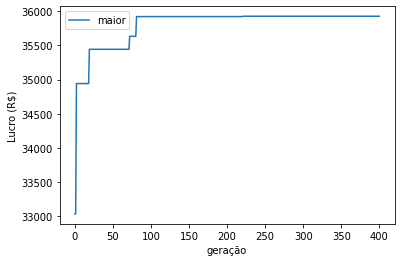

In [ ]:
gen, max = log.select('gen', 'max')
plt.plot(gen, max, label='maior')
plt.ylabel('Lucro (R$)')
plt.xlabel('geração')
plt.legend();